In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Simulated years
years = ["2022", "2023", "2024"]

# MIT departments and their codes
departments = {
    "6": "EECS",
    "18": "Mathematics"
}

base_url = "http://student.mit.edu/catalog/m{}a.html"

all_data = []

for year in years:
    for code, name in departments.items():
        url = base_url.format(code)
        r = requests.get(url)
        soup = BeautifulSoup(r.content, "html.parser")

        titles = soup.find_all("h3")
        descs = soup.find_all("p")

        for title, desc in zip(titles, descs):
            title_text = title.get_text(strip=True)
            desc_text = desc.get_text(strip=True)

            all_data.append({
                "title": title_text,
                "description": desc_text,
                "department": name,
                "year": int(year)
            })

# Save dataset
df = pd.DataFrame(all_data)
df.to_csv("../data/mit_courses_with_years.csv", index=False)
df.head()


,title,description,department,year
0,6.100A Introduction to Computer Science Progra...,6.100A Introduction to Computer Science Progra...,EECS,2022
1,6.100B Introduction to Computational Thinking ...,6.100B Introduction to Computational Thinking ...,EECS,2022
2,6.100L Introduction to Computer Science and Pr...,6.100L Introduction to Computer Science and Pr...,EECS,2022
3,6.1010 Fundamentals of Programming,"6.1010 Fundamentals of Programming(,)Prereq:6....",EECS,2022
4,6.1020 Software Construction,6.1020 Software Construction()Prereq:6.1010Uni...,EECS,2022


In [4]:
df = pd.read_csv("../data/mit_courses_with_years.csv")
df.dropna(subset=["description"], inplace=True)

keywords = ["python", "machine learning", "data", "ai", "statistics"]

# Count keywords by year
yearly_counts = []

for year in sorted(df["year"].unique()):
    year_df = df[df["year"] == year]
    all_text = " ".join(year_df["description"]).lower()
    
    counts = {kw: all_text.count(kw) for kw in keywords}
    counts["year"] = year
    yearly_counts.append(counts)

trend_df = pd.DataFrame(yearly_counts)
trend_df.set_index("year", inplace=True)
trend_df


,python,machine learning,data,ai,statistics
year,,,,,
2022,7,10,66,85,6
2023,7,10,66,85,6
2024,7,10,66,85,6


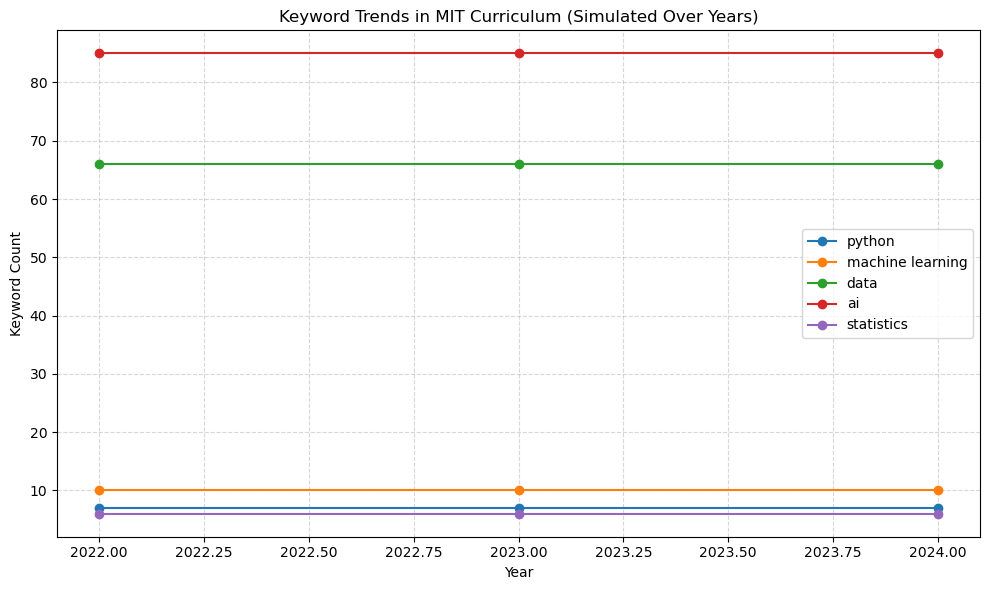

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for kw in trend_df.columns:
    plt.plot(trend_df.index, trend_df[kw], marker='o', label=kw)

plt.title("Keyword Trends in MIT Curriculum (Simulated Over Years)")
plt.xlabel("Year")
plt.ylabel("Keyword Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
